#Package Installation and Importation

In [ ]:
!pip uninstall -y numpy
!pip uninstall -y setuptools

!pip install numpy
!pip install setuptools

Found existing installation: numpy 1.26.1
Uninstalling numpy-1.26.1:
  Successfully uninstalled numpy-1.26.1
Found existing installation: setuptools 68.2.2
Uninstalling setuptools-68.2.2:
  Successfully uninstalled setuptools-68.2.2
  Using cached numpy-1.26.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires setuptools>=60.0.0, which is not installed.
cufflinks 0.17.3 requires setuptools>=34.4.1, which is not installed.
cvxpy 1.3.2 requires setuptools>65.5.1, which is not installed.
datascience 0.17.6 requires setuptools, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
mlxten

In [ ]:
!pip install nltk
!pip install seaborn
!pip install wordcloud

In [ ]:
# Ignore some warnings from being printed out
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Instatiate NLTK module
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Set up visualization configurations
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.style as style

# style.use('fivethirtyeight')
sns.set(rc={'figure.figsize':(12,6)})

In [ ]:
# Import other necessary packages
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Instantiate location and name of file to be analyzed
file_name = '/content/drive/MyDrive/CSCI 161.03 Final Project/Textual Corpus/fb_comments (removed blanks in message and added translated_text).csv'

# Pre-processing and Cleaning

In [ ]:
comments = pd.read_csv(file_name)

# Use if there's an error in reading the CSV file.
comments['translated_text'] = comments['translated_text'].fillna("")
comments.head(20)

,level,id,parent_id,object_id,object_type,object_key,query_status,query_time,query_type,created_time,like_count,comment_count,error.message,message,translated_text
0,1,6,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:13:10+0000,0,1,NaN,kaya ginaganahan kme manood gnan b nman kaganda,"That's why we enjoy watching, it's just so bea..."
1,1,7,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:13:13+0000,0,0,NaN,LOL?,LOL?
2,1,9,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:13:40+0000,4,4,NaN,"kapag nagkagustuhan silang dalawa, alam ko na ...","When the two of them like each other, I alread..."
3,1,10,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:13:54+0000,2,0,NaN,May mawawalan ng trabaho ata pagganyan.,Some people might lose their jobs if it's like...
4,1,11,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:14:02+0000,0,0,NaN,Mitch Andingan,Mitch Andingan
5,1,12,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:14:33+0000,1,0,NaN,si ellen pa din ang og..leyben leben lang😂✌️,Ellen is still the original... keep on fightin...
6,1,13,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:06+0000,0,0,NaN,Bakit ka pangalan ko pa talaga?🤭✌️,Why do you even have the same name as me? 🤭✌️
7,1,14,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:08+0000,0,1,NaN,Maia Angeles congrats! char aha,"Maia Angeles, congrats! Just kidding, haha."
8,1,15,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:14+0000,3,2,NaN,eng pineke mebilis eng pesok se next round ley...,The fastest one gets in the next round. Keep o...
9,1,16,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:21+0000,0,0,NaN,Cris Tagayun,Cris Tagayun


In [ ]:
# See if there are other stopwords we can add, such as AI, the names of the AI sportscaster, if necessary.
additional_stopwords = ["ai", "caster", "sportscaster", "gma", "im", "youre", "dont", "theyre", "sa", "oh", "yes", "really", "wont", "thats",
                        "wtf", "hahahahaha", "hahahaha", "hahaha", "haha", "bruh", "whats", "lol", "huh", "cant", "ug", "kaayo", "doesnt",
                        "damn", "didnt", "wow", "tsk", "theyll", "eat"]

fil_stopwords = ["akin","aking","ako","alin","am","amin","aming","ang","ano","anumang","apat","at","atin","ating",
                 "ay","bababa","bago","bakit","bawat","bilang","dahil","dalawa","dapat","din","dito","doon","gagawin",
                 "gayunman","ginagawa","ginawa","ginawang","gumawa","gusto","habang","hanggang","hindi","huwag","iba",
                 "ibaba","ibabaw","ibig","ikaw","ilagay","ilalim","ilan","inyong","isa","isang","itaas","ito","iyo",
                 "iyon","iyong","ka","kahit","kailangan","kailanman","kami","kanila","kanilang","kanino","kanya",
                 "kanyang","kapag","kapwa","karamihan","katiyakan","katulad","kaya","kaysa","ko","kong","kulang","kumuha",
                 "kung","laban","lahat","lamang","likod","lima","maaari","maaaring","maging","mahusay","makita","marami",
                 "marapat","masyado","may","mayroon","mga","minsan","mismo","mula","muli","na","nabanggit","naging","nagkaroon",
                 "nais","nakita","namin","napaka","narito","nasaan","ng","ngayon","ni","nila","nilang","nito","niya","niyang",
                 "noon","o","pa","paano","pababa","paggawa","pagitan","pagkakaroon","pagkatapos","palabas","pamamagitan","panahon",
                 "pangalawa","para","paraan","pareho","pataas","pero","pumunta","pumupunta","sa","saan","sabi","sabihin","sarili",
                 "sila","sino","siya","tatlo","tayo","tulad","tungkol","una","walang"]


stopwords.extend(additional_stopwords)
stopwords.extend(fil_stopwords)

In [ ]:
def clean_comments(comments):

    # Remove Facebook mentions (proper nouns)
    comments['cleaned_text'] = comments['translated_text'].apply(lambda row: ' '.join([word for word, tag in nltk.pos_tag(row.split()) if not (tag == 'NNP' and row.split().index(word) < 3)]))

    # Transform into lowercase
    comments['cleaned_text'] = comments['cleaned_text'].str.lower()

    # Remove usernames, non-alphanumeric characters, and links
    comments['cleaned_text'] = comments['cleaned_text'].str.replace(r'(@[A-Za-z0-9_]+)|([^A-Za-z0-9_ \t])|(\w+:\/\/\S+)', '')

    # turn them into string jic there's a number
    comments['cleaned_text'] = comments['cleaned_text'].apply(lambda a : str(a))

    # Remove stopwords
    comments['cleaned_text'] = comments['cleaned_text'].apply(lambda row: ' '.join([word for word in row.split() if word not in (stopwords)]))

    # Lemmatize verbs
    comments['cleaned_text'] = comments['cleaned_text'].apply(lambda row: ' '.join([lemmatizer.lemmatize(x, 'v') for x in row.split()]))

    # Lemmatize adjectives
    comments['cleaned_text'] = comments['cleaned_text'].apply(lambda row: ' '.join([lemmatizer.lemmatize(x, 'a') for x in row.split()]))

    # Lemmatize nouns
    comments['cleaned_text'] = comments['cleaned_text'].apply(lambda row: ' '.join([lemmatizer.lemmatize(x, 'n') for x in row.split()]))

    # Remove trailing and leading whitespaces
    comments['cleaned_text'] = comments['cleaned_text'].str.replace(r'^\s+|\s+$', '')

    # Remove rows with empty cells
    # comments = comments.loc[comments['cleaned_text']!='',:]
    comments['cleaned_text'] =  comments['cleaned_text'].replace('', np.nan, inplace=False)
    comments = comments.dropna(subset=['cleaned_text'], inplace=False)

    return comments

In [ ]:
cleaned_comments = clean_comments(comments)
cleaned_comments.head(25)

,level,id,parent_id,object_id,object_type,object_key,query_status,query_time,query_type,created_time,like_count,comment_count,error.message,message,translated_text,cleaned_text
0,1,6,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:13:10+0000,0,1,NaN,kaya ginaganahan kme manood gnan b nman kaganda,"That's why we enjoy watching, it's just so bea...",enjoy watch beautiful
2,1,9,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:13:40+0000,4,4,NaN,"kapag nagkagustuhan silang dalawa, alam ko na ...","When the two of them like each other, I alread...",two like already know theme song whydidtheynot...
3,1,10,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:13:54+0000,2,0,NaN,May mawawalan ng trabaho ata pagganyan.,Some people might lose their jobs if it's like...,people might lose job like
5,1,12,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:14:33+0000,1,0,NaN,si ellen pa din ang og..leyben leben lang😂✌️,Ellen is still the original... keep on fightin...,still original keep fight
6,1,13,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:06+0000,0,0,NaN,Bakit ka pangalan ko pa talaga?🤭✌️,Why do you even have the same name as me? 🤭✌️,even name
7,1,14,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:08+0000,0,1,NaN,Maia Angeles congrats! char aha,"Maia Angeles, congrats! Just kidding, haha.",congrats kid
8,1,15,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:14+0000,3,2,NaN,eng pineke mebilis eng pesok se next round ley...,The fastest one gets in the next round. Keep o...,fast one get next round keep fight still good ...
11,1,18,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:30+0000,1,1,NaN,Pag na introduce ang AI malamang goodbye call ...,"When AI is introduced, it's likely goodbye to ...",introduce likely goodbye call center filipino ...
12,1,19,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:16:09+0000,0,1,NaN,Hoping they are as authentic and as real as a ...,Hoping they are as authentic and real as a hum...,hop authentic real human
13,1,20,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:16:11+0000,9,3,NaN,So ito yung pinalit kay Chino Trinidad. Wow. 😳,"So, is this the replacement for Chino Trinidad...",replacement chino trinidad


In [ ]:
print(len(cleaned_comments))

18024


# Topic Modeling Testing


In [ ]:
!pip install pyLDAvis
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis

In [ ]:
vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, stop_words = 'english')
doc_term_matrix = vectorizer.fit_transform(cleaned_comments['cleaned_text'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
doc_term_matrix.toarray().shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(18024, 4315)

Different LDA's with different number of topics

In [ ]:
LDA_many = [
    LatentDirichletAllocation(n_components=3, random_state = 42),
    LatentDirichletAllocation(n_components=4, random_state = 42),
    LatentDirichletAllocation(n_components=5, random_state = 42),
    LatentDirichletAllocation(n_components=6, random_state = 42),
]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for i in LDA_many: i.fit(doc_term_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#how many topics each have
for i in LDA_many:
  print(len(i.components_))

3
4
5
6


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topic term matrices

In [ ]:
topic_term_matrices = [
    i.components_ for i in LDA_many
]

print(topic_term_matrices[0])

[[ 2.3307507   0.36753493 33.12733544 ...  5.29725905  5.3051609
   0.33454018]
 [ 0.33433802  0.35725971  0.345745   ...  0.35397243  0.34870391
   2.3307123 ]
 [ 0.33491127  2.27520536  0.52691956 ...  0.34876852  0.34613519
   0.33474752]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
doc_topic_matrices = [
    i.transform(doc_term_matrix) for i in LDA_many
]

print(doc_topic_matrices)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[array([[0.49670354, 0.11185697, 0.39143949],
       [0.06997543, 0.07228199, 0.85774258],
       [0.06780004, 0.86392468, 0.06827528],
       ...,
       [0.07593357, 0.85714407, 0.06692237],
       [0.06935064, 0.06992582, 0.86072354],
       [0.15566175, 0.72872844, 0.11560981]]), array([[0.59510538, 0.27545341, 0.06428947, 0.06515174],
       [0.05130913, 0.05278351, 0.84533212, 0.05057523],
       [0.05032016, 0.84894534, 0.05033482, 0.05039968],
       ...,
       [0.05158888, 0.84593896, 0.05045344, 0.05201871],
       [0.0517275 , 0.05149649, 0.42417449, 0.47260152],
       [0.09108873, 0.73806617, 0.08473748, 0.08610762]]), array([[0.36473387, 0.0500992 , 0.05046534, 0.05069683, 0.48400475],
       [0.04056774, 0.04066681, 0.83831999, 0.04013651, 0.04030894],
       [0.04012336, 0.83947504, 0.04016946, 0.04011243, 0.04011971],
       ...,
       [0.04048178, 0.83864043, 0.04019126, 0.04055402, 0.04013252],
       [0.04000641, 0.04054801, 0.04127627, 0.3460879 , 0.5320814 ],
  

prepare the array of the visualization

In [ ]:
vocab = vectorizer.get_feature_names_out()
doc_lengths = [len(doc) for doc in cleaned_comments['cleaned_text']]
term_freqs = doc_term_matrix.sum(axis=0)
term_freqs = np.array(term_freqs).flatten()
vis_data_all = [
  pyLDAvis.prepare(topic_term_matrices[i] , doc_topic_matrices[i], doc_lengths, vocab, term_freqs) for i in range(0,len(LDA_many))
]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

LDA with 3 topics

In [ ]:
pyLDAvis.display(vis_data_all[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA with 4 topics

In [ ]:
pyLDAvis.display(vis_data_all[1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA with 5 topics

In [ ]:
pyLDAvis.display(vis_data_all[2])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA with 6 topics

In [ ]:
pyLDAvis.display(vis_data_all[3])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Topic Modeling Final


In [ ]:
LDA = LatentDirichletAllocation(n_components=4, random_state = 42)
LDA.fit(doc_term_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=4, random_state=42)

In [ ]:
len(LDA.components_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4

In [ ]:
topic_term_matrix = LDA.components_
topic_term_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 2.24962208,  0.25007113, 29.84511518, ...,  5.24479685,
         5.2390032 ,  0.25016702],
       [ 0.25009962,  0.25005445,  0.26128509, ...,  0.25497932,
         0.25306148,  2.24951776],
       [ 0.25017682,  0.27486703,  3.62754526, ...,  0.25013147,
         0.25137956,  0.2501981 ],
       [ 0.25010149,  2.2250074 ,  0.26605447, ...,  0.25009236,
         0.25655577,  0.25011712]])

In [ ]:
for index, topic in enumerate(LDA.components_):
  print(f'The top 15 words for topic #{index}')
  print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
  print('\n')

The top 15 words for topic #0
['lack', 'sport', 'time', 'good', 'happen', 'need', 'great', 'feel', 'work', 'scary', 'like', 'thing', 'human', 'think', 'emotion']


The top 15 words for topic #1
['think', 'come', 'soon', 'creepy', 'future', 'robot', 'human', 'look', 'good', 'real', 'lose', 'replace', 'like', 'people', 'job']


The top 15 words for topic #2
['caster', 'bad', 'good', 'make', 'graduate', 'broadcast', 'journalism', 'sad', 'like', 'ugly', 'student', 'mass', 'study', 'communication', 'news']


The top 15 words for topic #3
['sportscaster', 'save', 'pay', 'money', 'reporter', 'say', 'want', 'right', 'maybe', 'need', 'future', 'work', 'use', 'human', 'people']




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
doc_topic_matrix = LDA.transform(doc_term_matrix)
doc_topic_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.59510538, 0.27545341, 0.06428947, 0.06515174],
       [0.05130913, 0.05278351, 0.84533212, 0.05057523],
       [0.05032016, 0.84894534, 0.05033482, 0.05039968],
       ...,
       [0.05158888, 0.84593896, 0.05045344, 0.05201871],
       [0.0517275 , 0.05149649, 0.42417449, 0.47260152],
       [0.09108873, 0.73806617, 0.08473748, 0.08610762]])

In [ ]:
cleaned_comments['topic'] = doc_topic_matrix.argmax(axis=1)
cleaned_comments.head(25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,level,id,parent_id,object_id,object_type,object_key,query_status,query_time,query_type,created_time,like_count,comment_count,error.message,message,translated_text,cleaned_text,topic
0,1,6,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:13:10+0000,0,1,NaN,kaya ginaganahan kme manood gnan b nman kaganda,"That's why we enjoy watching, it's just so bea...",enjoy watch beautiful,0
2,1,9,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:13:40+0000,4,4,NaN,"kapag nagkagustuhan silang dalawa, alam ko na ...","When the two of them like each other, I alread...",two like already know theme song whydidtheynot...,2
3,1,10,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:13:54+0000,2,0,NaN,May mawawalan ng trabaho ata pagganyan.,Some people might lose their jobs if it's like...,people might lose job like,1
5,1,12,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:14:33+0000,1,0,NaN,si ellen pa din ang og..leyben leben lang😂✌️,Ellen is still the original... keep on fightin...,still original keep fight,0
6,1,13,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:06+0000,0,0,NaN,Bakit ka pangalan ko pa talaga?🤭✌️,Why do you even have the same name as me? 🤭✌️,even name,0
7,1,14,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:08+0000,0,1,NaN,Maia Angeles congrats! char aha,"Maia Angeles, congrats! Just kidding, haha.",congrats kid,2
8,1,15,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:14+0000,3,2,NaN,eng pineke mebilis eng pesok se next round ley...,The fastest one gets in the next round. Keep o...,fast one get next round keep fight still good ...,1
11,1,18,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:30+0000,1,1,NaN,Pag na introduce ang AI malamang goodbye call ...,"When AI is introduced, it's likely goodbye to ...",introduce likely goodbye call center filipino ...,1
12,1,19,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:16:09+0000,0,1,NaN,Hoping they are as authentic and as real as a ...,Hoping they are as authentic and real as a hum...,hop authentic real human,1
13,1,20,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:16:11+0000,9,3,NaN,So ito yung pinalit kay Chino Trinidad. Wow. 😳,"So, is this the replacement for Chino Trinidad...",replacement chino trinidad,1


In [ ]:
vocab = vectorizer.get_feature_names_out()
doc_lengths = [len(doc) for doc in cleaned_comments['cleaned_text']]
term_freqs = doc_term_matrix.sum(axis=0)
term_freqs = np.array(term_freqs).flatten()
vis_data = pyLDAvis.prepare(topic_term_matrix , doc_topic_matrix, doc_lengths, vocab, term_freqs)

pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


# Sentiment Analysis (VADER)

In [ ]:
# download VADER lexicon
nltk.download(["vader_lexicon"])

# import and initialize our sentiment analyzer
from nltk.sentiment import SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Function to perform sentiment analysis
def sentiment_analysis(dataframe, textcolumn='cleaned_text'):
  for index, row in dataframe.iterrows():                       # iterate the rows of the dataframe
    senti_score = senti.polarity_scores(str(row[textcolumn]))   # get the sentiment scores
    dataframe.loc[index,'neg'] = senti_score['neg']             # append the negative score
    dataframe.loc[index,'neu'] = senti_score['neu']             # append the neutral score
    dataframe.loc[index,'pos'] = senti_score['pos']             # append the positive score
    dataframe.loc[index,'compound'] = senti_score['compound']   # append the compound score
  return dataframe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Perform sentiment analysis on facebook comments
ai_sentiments = sentiment_analysis(cleaned_comments, textcolumn='cleaned_text')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [ ]:
# Take a look at the sentiment scores
ai_sentiments[['translated_text','neg','neu','pos','compound']].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,translated_text,neg,neu,pos,compound
0,"That's why we enjoy watching, it's just so bea...",0.000,0.123,0.877,0.7964
2,"When the two of them like each other, I alread...",0.000,0.706,0.294,0.3612
3,Some people might lose their jobs if it's like...,0.329,0.366,0.305,-0.0516
5,Ellen is still the original... keep on fightin...,0.377,0.290,0.333,-0.0772
6,Why do you even have the same name as me? 🤭✌️,0.000,1.000,0.000,0.0000


In [ ]:
ai_sentiments[['neg','neu','pos','compound']].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,neg,neu,pos,compound
count,18024.000000,18024.000000,18024.000000,18024.000000
mean,0.160464,0.665201,0.172673,0.041955
std,0.282997,0.343865,0.270910,0.361850
min,0.000000,0.000000,0.000000,-0.968000
25%,0.000000,0.408000,0.000000,-0.051600
50%,0.000000,0.697000,0.000000,0.000000
75%,0.241000,1.000000,0.315000,0.318200
max,1.000000,1.000000,1.000000,0.994700


In [ ]:
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cleaned_comments["analysis"] = cleaned_comments["compound"].apply(getAnalysis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cleaned_comments.head(25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,level,id,parent_id,object_id,object_type,object_key,query_status,query_time,query_type,created_time,...,error.message,message,translated_text,cleaned_text,topic,neg,neu,pos,compound,analysis
0,1,6,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:13:10+0000,...,NaN,kaya ginaganahan kme manood gnan b nman kaganda,"That's why we enjoy watching, it's just so bea...",enjoy watch beautiful,0,0.000,0.123,0.877,0.7964,Positive
2,1,9,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:13:40+0000,...,NaN,"kapag nagkagustuhan silang dalawa, alam ko na ...","When the two of them like each other, I alread...",two like already know theme song whydidtheynot...,2,0.000,0.706,0.294,0.3612,Positive
3,1,10,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:13:54+0000,...,NaN,May mawawalan ng trabaho ata pagganyan.,Some people might lose their jobs if it's like...,people might lose job like,1,0.329,0.366,0.305,-0.0516,Negative
5,1,12,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:14:33+0000,...,NaN,si ellen pa din ang og..leyben leben lang😂✌️,Ellen is still the original... keep on fightin...,still original keep fight,0,0.377,0.290,0.333,-0.0772,Negative
6,1,13,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:06+0000,...,NaN,Bakit ka pangalan ko pa talaga?🤭✌️,Why do you even have the same name as me? 🤭✌️,even name,0,0.000,1.000,0.000,0.0000,Neutral
7,1,14,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:08+0000,...,NaN,Maia Angeles congrats! char aha,"Maia Angeles, congrats! Just kidding, haha.",congrats kid,2,0.000,0.227,0.773,0.5267,Positive
8,1,15,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:14+0000,...,NaN,eng pineke mebilis eng pesok se next round ley...,The fastest one gets in the next round. Keep o...,fast one get next round keep fight still good ...,1,0.141,0.703,0.157,0.0772,Positive
11,1,18,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:15:30+0000,...,NaN,Pag na introduce ang AI malamang goodbye call ...,"When AI is introduced, it's likely goodbye to ...",introduce likely goodbye call center filipino ...,1,0.338,0.662,0.000,-0.6249,Negative
12,1,19,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:16:09+0000,...,NaN,Hoping they are as authentic and as real as a ...,Hoping they are as authentic and real as a hum...,hop authentic real human,1,0.000,1.000,0.000,0.0000,Neutral
13,1,20,1,116724526976_718399736998353,data,data.*,fetched (200),2023-11-01 17:02:23,Facebook:/<post-id>/comments,2023-09-23T04:16:11+0000,...,NaN,So ito yung pinalit kay Chino Trinidad. Wow. 😳,"So, is this the replacement for Chino Trinidad...",replacement chino trinidad,1,0.000,1.000,0.000,0.0000,Neutral


In [ ]:
cleaned_comments.loc[:,['message', 'translated_text', 'topic', 'analysis']].to_excel('/content/drive/My Drive/CSCI 161.03 Final Project/Textual Corpus/categorized_fb_comments.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


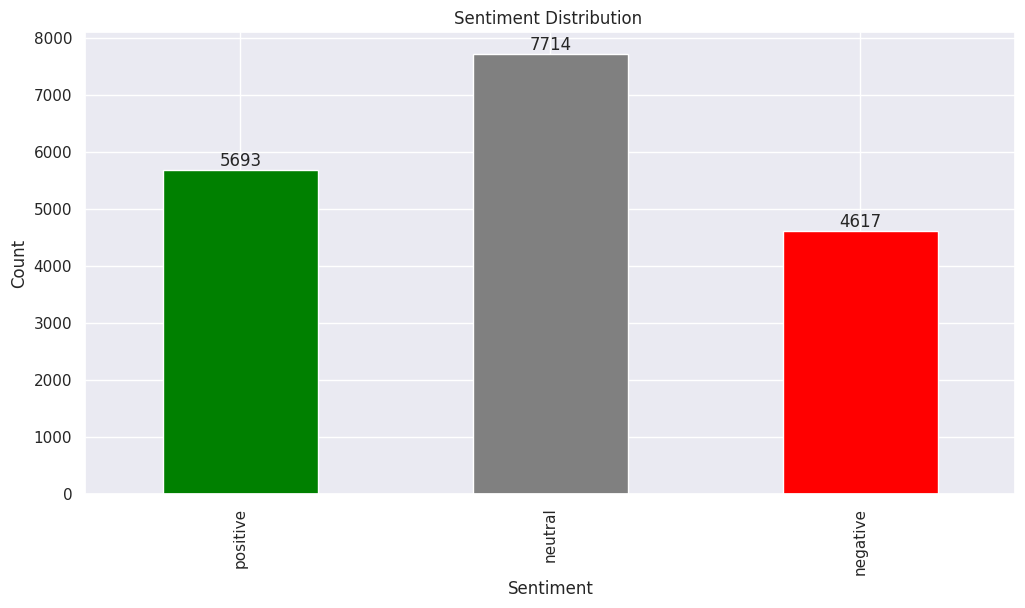

In [ ]:
# Visualize sentiment counts
def visualize_sentiment_counts(dataframe):
    # Calculate sentiment counts
    sentiment_counts = dataframe['compound'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))
    sentiment_counts = sentiment_counts.value_counts()

    # Create a bar chart for sentiment counts
    sentiment_counts = sentiment_counts.reindex(['positive', 'neutral', 'negative'])
    sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
    plt.title('Sentiment Distribution ')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')

    # Add value annotations on each bar
    for index, value in enumerate(sentiment_counts):
        plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

    # Show the bar chart
    plt.show()

# Function to visualize sentiment counts
visualize_sentiment_counts(ai_sentiments)

#Sentiment and Topic

In [ ]:
#merge topic and sentiment
my_list = cleaned_comments.columns.values.tolist()
my_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['level',
 'id',
 'parent_id',
 'object_id',
 'object_type',
 'object_key',
 'query_status',
 'query_time',
 'query_type',
 'created_time',
 'like_count',
 'comment_count',
 'error.message',
 'message',
 'translated_text',
 'cleaned_text',
 'topic',
 'neg',
 'neu',
 'pos',
 'compound',
 'analysis']

In [ ]:
#topic dictionary
topic_dict = {
    "Job Replacement in the Future":0,
    "Job Replacement due to Cost-Cutting":1,
    "Effect on Courses such as Mass Communication":2,
    "Emotions towards AI":3
}

# Visualize sentiment counts along with the topics
def visualize_sentiment_counts_per_topic(dataframe, topic):
    # Calculate sentiment counts
    sentiment_counts = dataframe[dataframe['topic'].isin([topic])]['compound'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))
    sentiment_counts = sentiment_counts.value_counts()

    # Create a bar chart for sentiment counts
    sentiment_counts = sentiment_counts.reindex(['positive', 'neutral', 'negative'])
    sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
    plt.title('Sentiment Distribution on topic '+str(topic))
    plt.xlabel('Sentiment')
    plt.ylabel('Count')

    # Add value annotations on each bar
    for index, value in enumerate(sentiment_counts):
        plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

    # Show the bar chart
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


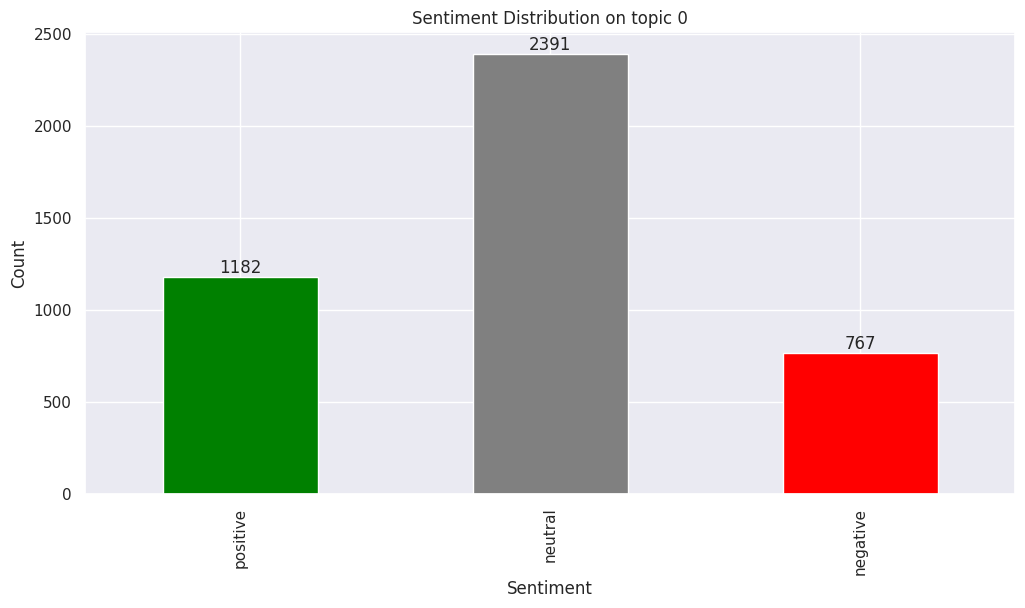

In [ ]:
# Call function to visualize sentiment counts
visualize_sentiment_counts_per_topic(ai_sentiments,topic_dict["Job Replacement in the Future"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


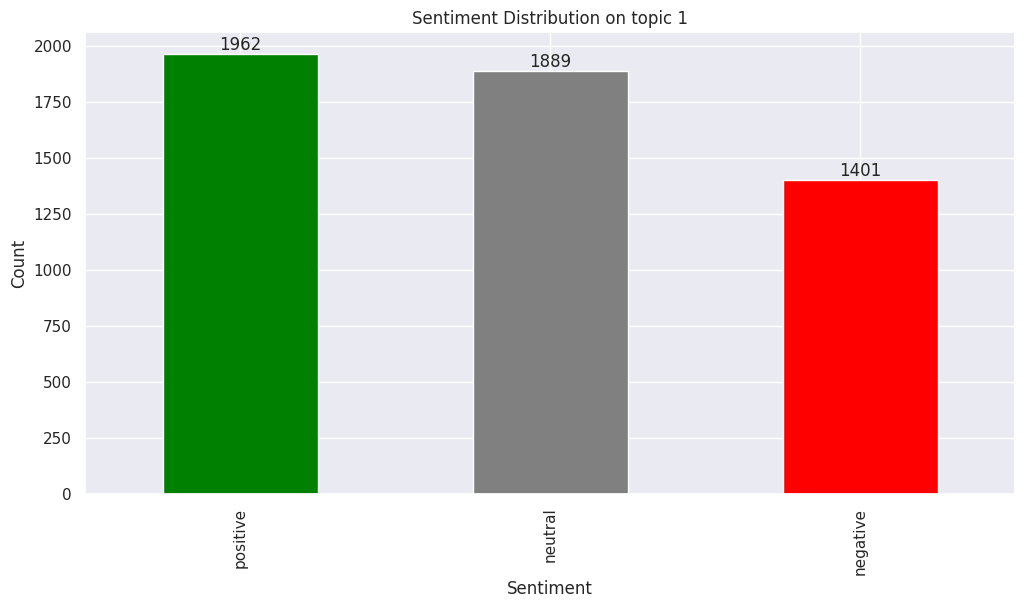

In [ ]:
visualize_sentiment_counts_per_topic(ai_sentiments,topic_dict["Job Replacement due to Cost-Cutting"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


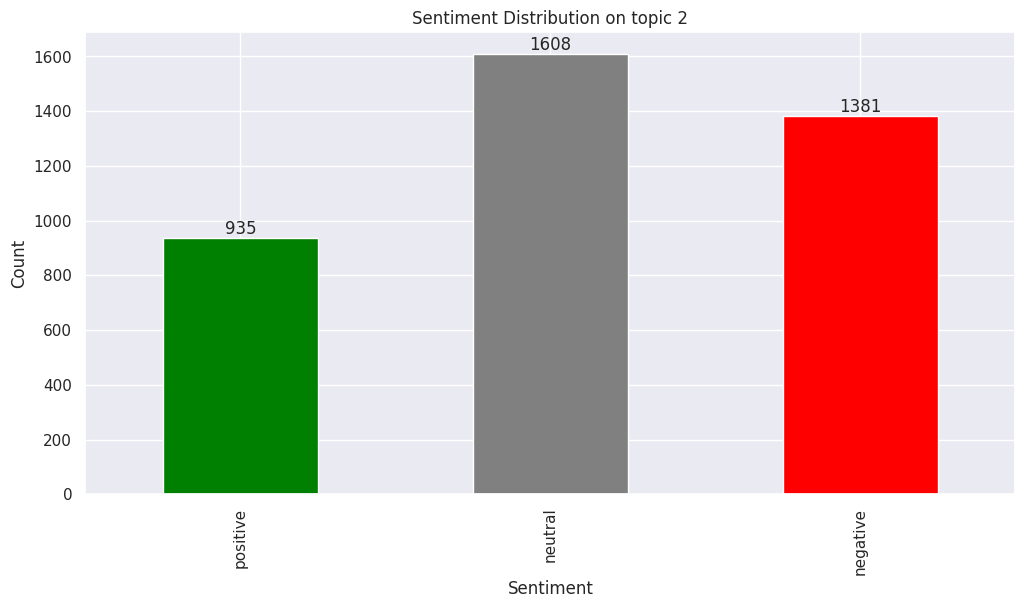

In [ ]:
visualize_sentiment_counts_per_topic(ai_sentiments,topic_dict["Effect on Courses such as Mass Communication"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


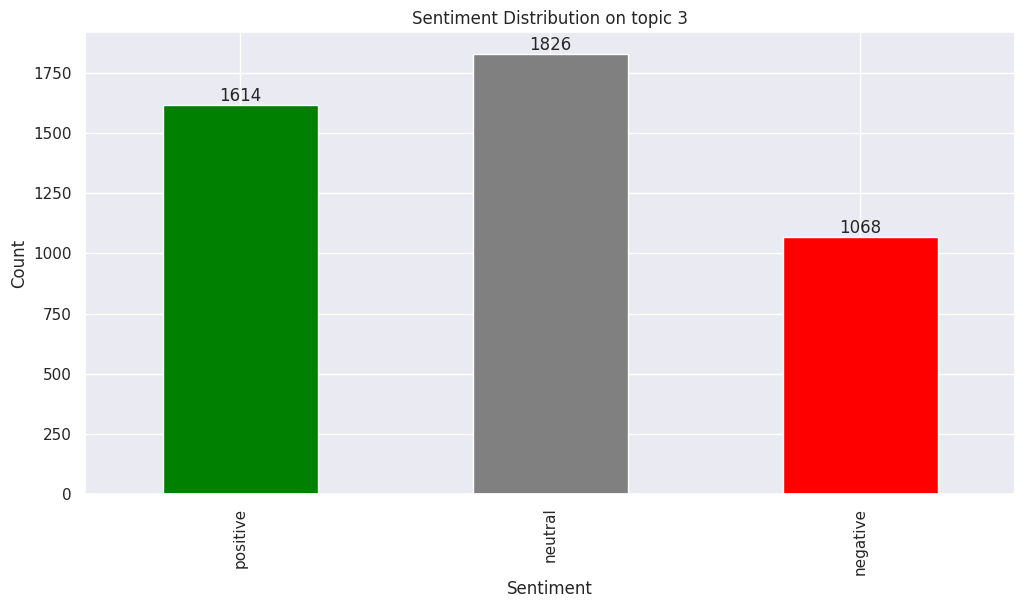

In [ ]:
visualize_sentiment_counts_per_topic(ai_sentiments,topic_dict["Emotions towards AI"])

In [ ]:
#save everything into an xlsx
file_name = '/content/drive/MyDrive/CSCI 161.03 Final Project/Textual Corpus/data.xlsx'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
